Dataset Columns: Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Missing Values:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


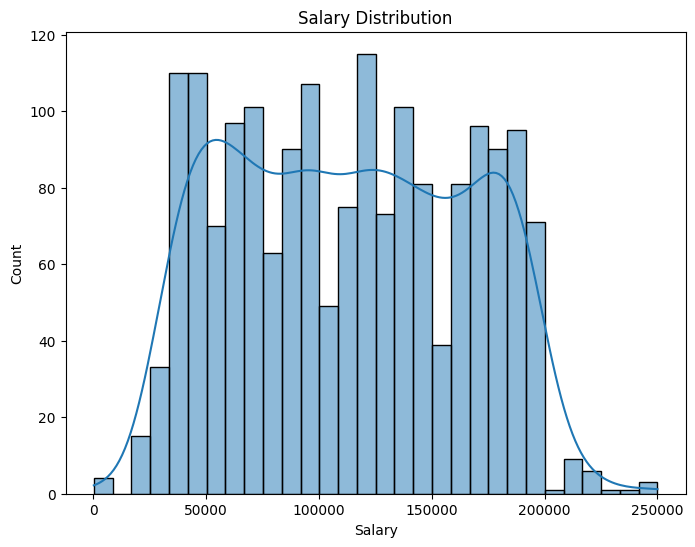

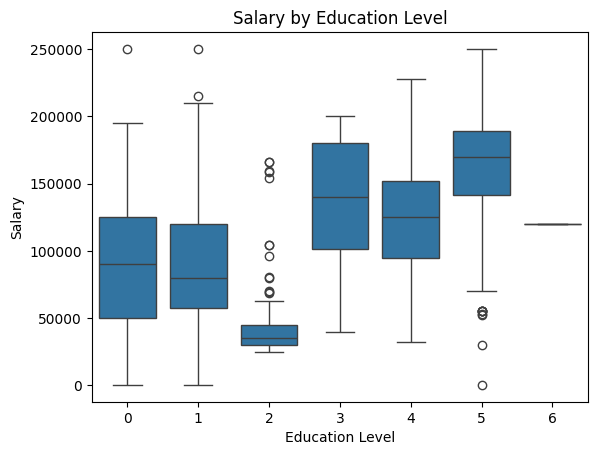

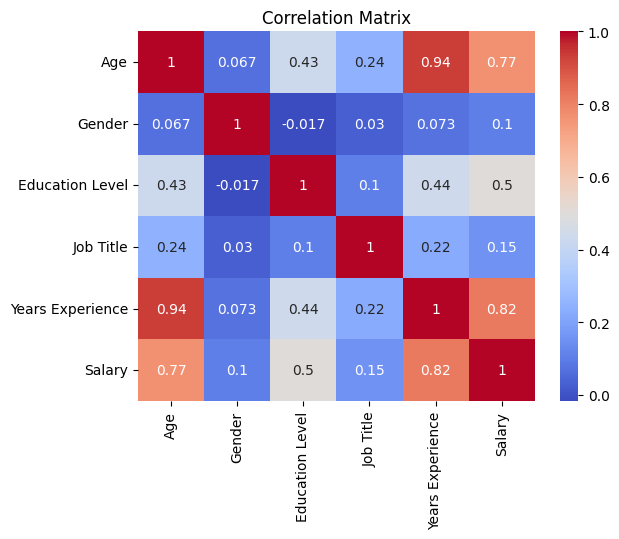


T-test: t-statistic=-0.5009783647254918, p-value=0.6165302733830118
ANOVA: f-statistic=150.53765490295848, p-value=1.6006095622284473e-55
Chi-square test: chi2=29656.552027668735, p-value=1.0

Regression Analysis Summary:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1360.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:34:43   Log-Likelihood:                -20863.
No. Observations:                1787   AIC:                         4.173e+04
Df Residuals:                    1783   BIC:                         4.176e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                             

In [16]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load Dataset
df = pd.read_csv('Salary_Dataset.csv')

# Display dataset columns for debugging
print("Dataset Columns:", df.columns)

# Data Cleaning
print("\nMissing Values:")
print(df.isnull().sum())
df.dropna(inplace=True)  # Remove rows with missing values

# Remove Duplicates
df.drop_duplicates(inplace=True)

# Convert categorical variables
label_enc = LabelEncoder()
if 'Gender' in df.columns:  # Encode Gender if it exists
    df['Gender'] = label_enc.fit_transform(df['Gender'])
df['Education Level'] = label_enc.fit_transform(df['Education Level'])
df['Job Title'] = label_enc.fit_transform(df['Job Title'])

# Ensure 'Years Experience' column exists
if 'Years Experience' not in df.columns:
    for col in df.columns:
        if 'experience' in col.lower():  # Find column dynamically
            df.rename(columns={col: 'Years Experience'}, inplace=True)

# Ensure 'Salary' column exists before proceeding
if 'Salary' not in df.columns:
    raise KeyError("The dataset does not contain a 'Salary' column.")

# Remove outliers using IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Salary'] >= Q1 - 1.5 * IQR) & (df['Salary'] <= Q3 + 1.5 * IQR)]

# Exploratory Data Analysis
plt.figure(figsize=(8,6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()

sns.boxplot(x='Education Level', y='Salary', data=df)
plt.title('Salary by Education Level')
plt.show()

# Select only numerical columns before calculating correlation matrix
numerical_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Statistical Analysis
degree = df[df['Education Level'] == 1]['Salary']
no_degree = df[df['Education Level'] == 0]['Salary']
t_stat, p_value = ttest_ind(degree, no_degree)
print(f"\nT-test: t-statistic={t_stat}, p-value={p_value}")

bachelors = df[df['Education Level'] == 1]['Salary']
masters = df[df['Education Level'] == 2]['Salary']
phd = df[df['Education Level'] == 3]['Salary']
f_stat, p_value = f_oneway(bachelors, masters, phd)
print(f"ANOVA: f-statistic={f_stat}, p-value={p_value}")

contingency_table = pd.crosstab(df['Job Title'], df['Salary'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test: chi2={chi2}, p-value={p}")

# Regression Analysis
X = df[['Years Experience', 'Education Level', 'Job Title']]
X = sm.add_constant(X)
y = df['Salary']
model = sm.OLS(y, X).fit()
print("\nRegression Analysis Summary:")
print(model.summary())

# Salary Prediction Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
print("\nSalary Predictions (First 5 rows):", predictions[:5])



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               100 non-null    object 
 1   Customer Segment   100 non-null    object 
 2   Campaign Type      100 non-null    object 
 3   Marketing Channel  100 non-null    object 
 4   Engagement Rate    100 non-null    float64
 5   Conversion Rate    100 non-null    float64
dtypes: float64(2), object(4)
memory usage: 4.8+ KB
None

Missing Values:
Date                 0
Customer Segment     0
Campaign Type        0
Marketing Channel    0
Engagement Rate      0
Conversion Rate      0
dtype: int64

Summary Statistics:
                      Date  Engagement Rate  Conversion Rate
count                  100       100.000000       100.000000
mean   2024-02-19 12:00:00        11.647700         6.371700
min    2024-01-01 00:00:00         5.080000         2.120000
25% 

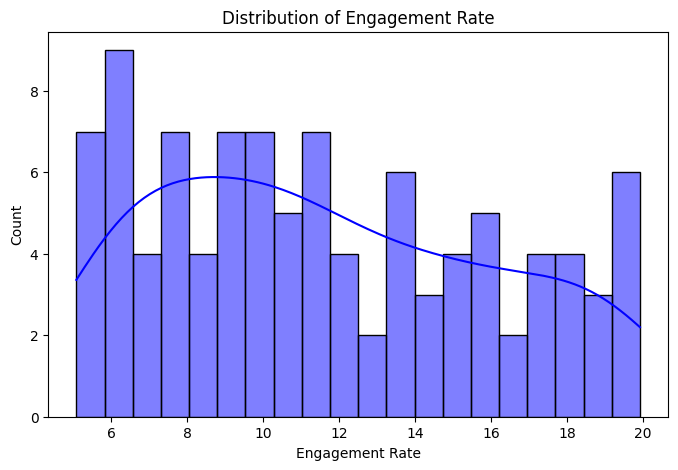

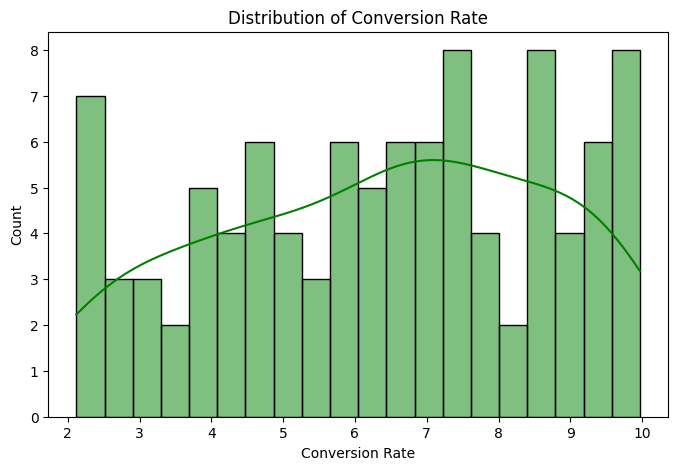

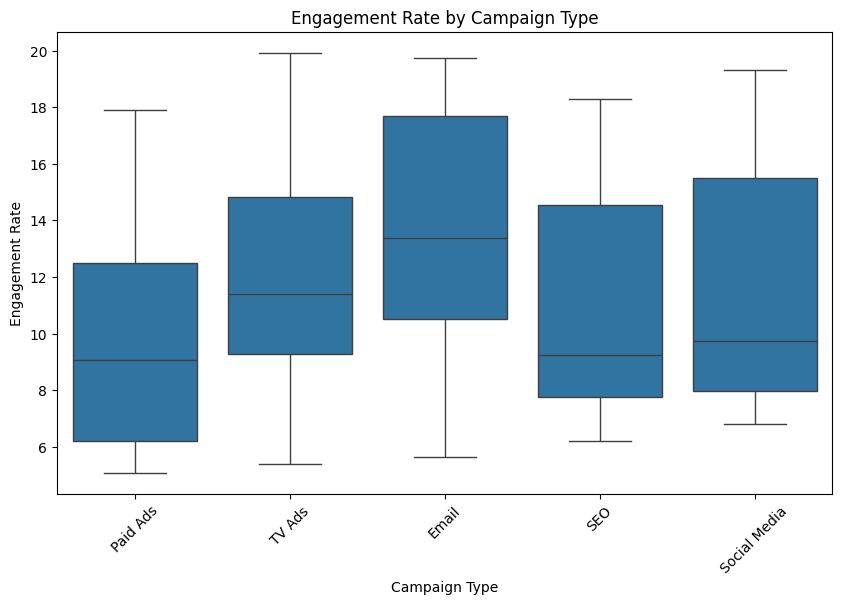

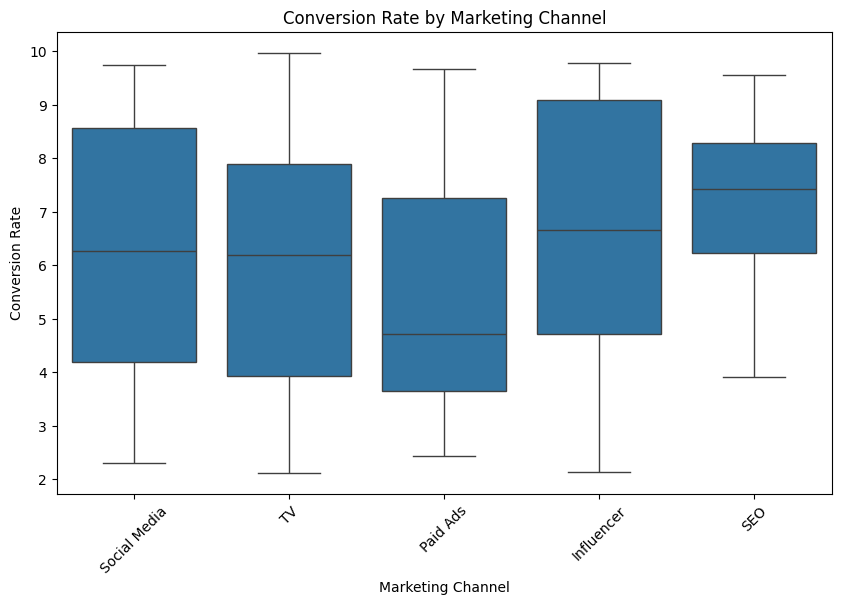

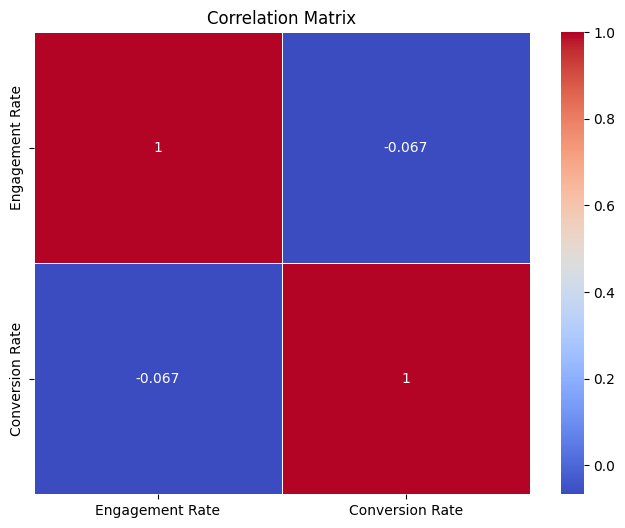


T-test: t-statistic=-1.4611, p-value=0.1522

ANOVA Test: f-statistic=1.4005, p-value=0.2397

EDA Completed Successfully ✅


In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# Load Dataset
df = pd.read_csv("marketing_data.csv")

# Display basic info
print("\nDataset Overview:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop missing values
df.dropna(inplace=True)

# Convert date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Engagement Rate Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Engagement Rate"], bins=20, kde=True, color="blue")
plt.title("Distribution of Engagement Rate")
plt.show()

# Conversion Rate Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Conversion Rate"], bins=20, kde=True, color="green")
plt.title("Distribution of Conversion Rate")
plt.show()

# Campaign Performance Comparison
plt.figure(figsize=(10,6))
sns.boxplot(x="Campaign Type", y="Engagement Rate", data=df)
plt.xticks(rotation=45)
plt.title("Engagement Rate by Campaign Type")
plt.show()

# Marketing Channel Effectiveness
plt.figure(figsize=(10,6))
sns.boxplot(x="Marketing Channel", y="Conversion Rate", data=df)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Marketing Channel")
plt.show()

# Correlation Matrix
numerical_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

# Statistical Analysis: T-Test
email_campaign = df[df["Campaign Type"] == "Email"]["Conversion Rate"]
social_media_campaign = df[df["Campaign Type"] == "Social Media"]["Conversion Rate"]
t_stat, p_value = ttest_ind(email_campaign, social_media_campaign)
print(f"\nT-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")

# ANOVA Test for Multiple Campaigns
campaign_groups = [df[df["Campaign Type"] == camp]["Conversion Rate"] for camp in df["Campaign Type"].unique()]
f_stat, p_value = f_oneway(*campaign_groups)
print(f"\nANOVA Test: f-statistic={f_stat:.4f}, p-value={p_value:.4f}")

print("\nEDA Completed Successfully ✅")



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               100 non-null    object 
 1   Customer Segment   100 non-null    object 
 2   Campaign Type      100 non-null    object 
 3   Marketing Channel  100 non-null    object 
 4   Engagement Rate    100 non-null    float64
 5   Conversion Rate    100 non-null    float64
dtypes: float64(2), object(4)
memory usage: 4.8+ KB
None

Missing Values:
Date                 0
Customer Segment     0
Campaign Type        0
Marketing Channel    0
Engagement Rate      0
Conversion Rate      0
dtype: int64

Summary Statistics:
                      Date  Engagement Rate  Conversion Rate
count                  100       100.000000       100.000000
mean   2024-02-19 12:00:00        11.647700         6.371700
min    2024-01-01 00:00:00         5.080000         2.120000
25% 

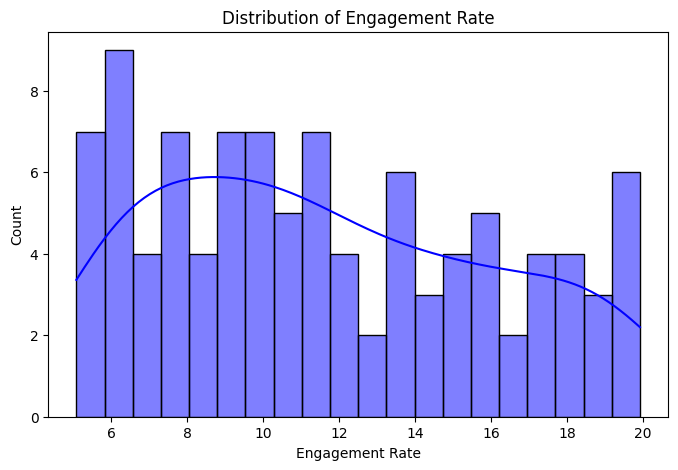

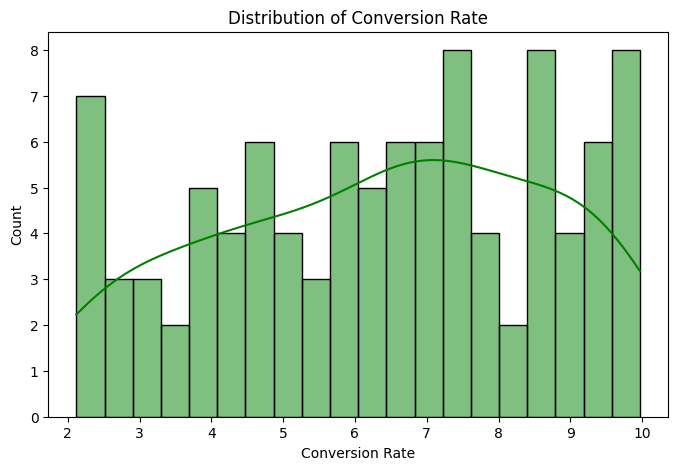

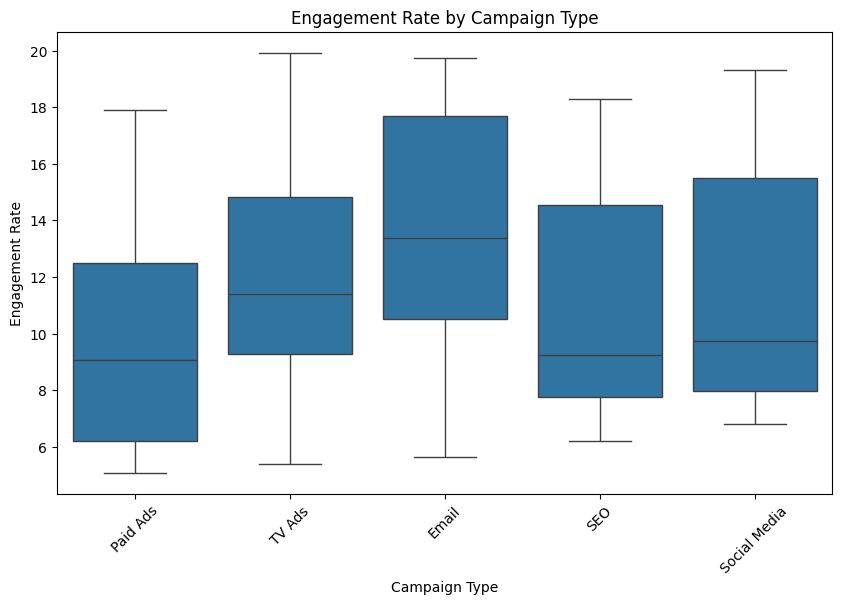

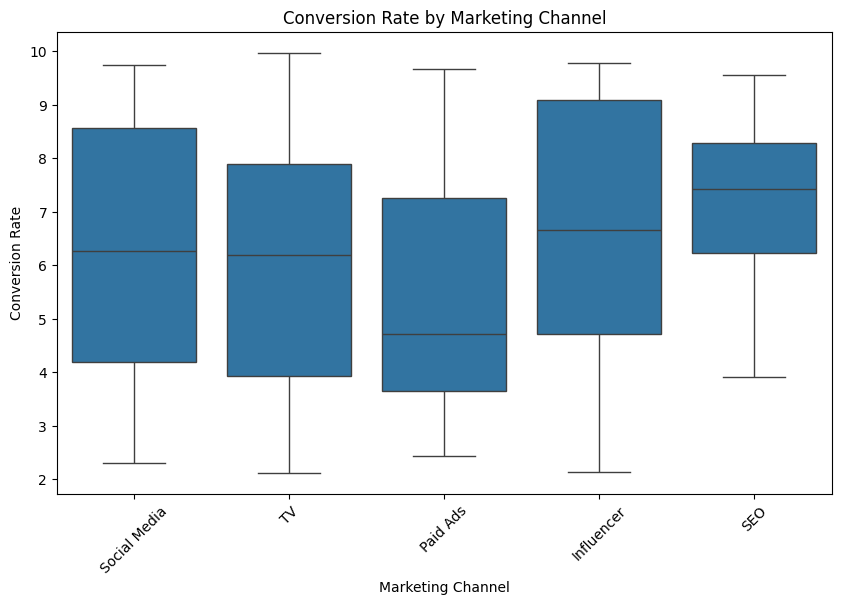

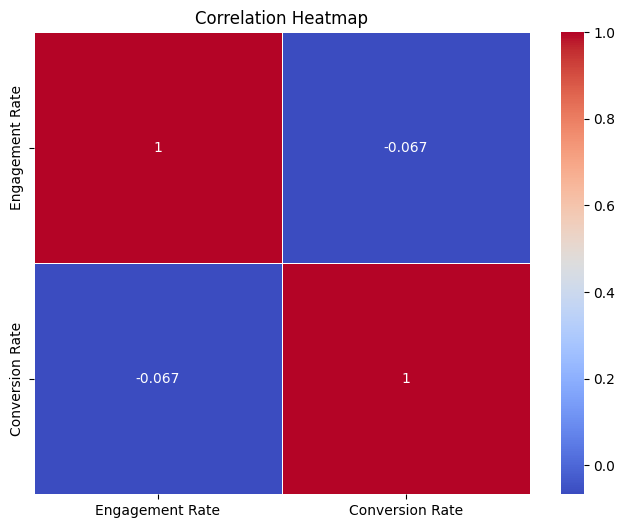


T-test: t-statistic=-1.4611, p-value=0.1522

ANOVA Test: f-statistic=1.4005, p-value=0.2397

✅ EDA Completed Successfully!


In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway

# Load Dataset
df = pd.read_csv("marketing_data.csv")

# Display dataset info
print("\nDataset Overview:")
print(df.info())

# Convert 'Date' column to datetime format
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handling Missing Values
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())  # Fill numerical columns with median

for col in df.select_dtypes(include=[object]).columns:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill categorical columns with mode

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Remove outliers using IQR
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# Visualization: Engagement Rate Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Engagement Rate"], bins=20, kde=True, color="blue")
plt.title("Distribution of Engagement Rate")
plt.show()

# Visualization: Conversion Rate Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Conversion Rate"], bins=20, kde=True, color="green")
plt.title("Distribution of Conversion Rate")
plt.show()

# Campaign Performance Comparison
plt.figure(figsize=(10,6))
sns.boxplot(x="Campaign Type", y="Engagement Rate", data=df)
plt.xticks(rotation=45)
plt.title("Engagement Rate by Campaign Type")
plt.show()

# Marketing Channel Effectiveness
plt.figure(figsize=(10,6))
sns.boxplot(x="Marketing Channel", y="Conversion Rate", data=df)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Marketing Channel")
plt.show()

# Ensure only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Statistical Analysis: T-Test
if "Campaign Type" in df.columns:
    email_campaign = df[df["Campaign Type"] == "Email"]["Conversion Rate"]
    social_media_campaign = df[df["Campaign Type"] == "Social Media"]["Conversion Rate"]
    t_stat, p_value = ttest_ind(email_campaign, social_media_campaign, nan_policy='omit')
    print(f"\nT-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")

# ANOVA Test for Multiple Campaigns
campaign_groups = [df[df["Campaign Type"] == camp]["Conversion Rate"] for camp in df["Campaign Type"].unique()]
f_stat, p_value = f_oneway(*campaign_groups)
print(f"\nANOVA Test: f-statistic={f_stat:.4f}, p-value={p_value:.4f}")

print("\n✅ EDA Completed Successfully!")


First 5 rows of the dataset:
         Date Customer Segment Campaign Type Marketing Channel  \
0  2024-01-01          Economy      Paid Ads      Social Media   
1  2024-01-02          Premium        TV Ads                TV   
2  2024-01-03          Economy        TV Ads          Paid Ads   
3  2024-01-04          Economy         Email        Influencer   
4  2024-01-05          Premium        TV Ads               SEO   

   Engagement Rate  Conversion Rate  
0            12.49             4.49  
1            13.58             9.84  
2            16.53             3.40  
3             5.65             2.14  
4            19.92             8.11  

Missing values in the dataset:
Date                 0
Customer Segment     0
Campaign Type        0
Marketing Channel    0
Engagement Rate      0
Conversion Rate      0
dtype: int64

Descriptive Statistics:
       Engagement Rate  Conversion Rate
count       100.000000       100.000000
mean         11.647700         6.371700
std           4.38

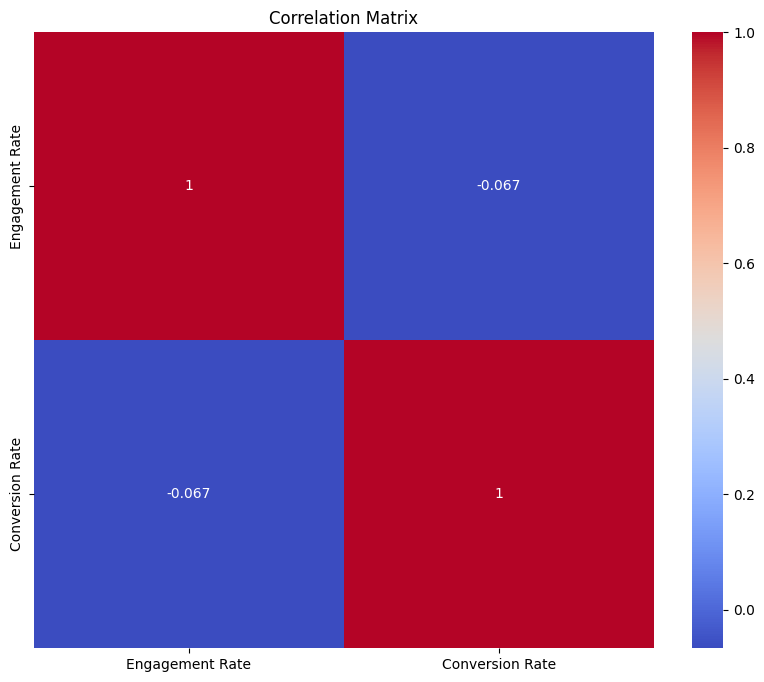


'campaign' column not found in the dataset. Skipping campaign performance analysis.

'date' column not found in the dataset. Skipping trend analysis.

'campaign' or 'conversions' column not found in the dataset. Skipping A/B testing.

'campaign' or 'conversions' column not found in the dataset. Skipping interactive dashboard.


In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

# Load the dataset
data = pd.read_csv('marketing_data.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Handle missing values (fill with 0 or drop)
data.fillna(0, inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Basic descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Check if required columns exist
required_columns = ['clicks', 'conversions']
for col in required_columns:
    if col not in data.columns:
        print(f"Warning: Column '{col}' not found in the dataset. Skipping related analysis.")
        # Optionally, you can skip the entire analysis or proceed with available columns

# Calculate additional metrics (e.g., conversion rate) if columns exist
if 'clicks' in data.columns and 'conversions' in data.columns:
    data['conversion_rate'] = (data['conversions'] / data['clicks']) * 100
    data['conversion_rate'].fillna(0, inplace=True)  # Handle division by zero
else:
    print("Skipping conversion rate calculation due to missing columns.")

# Distribution of key metrics (if conversion_rate exists)
if 'conversion_rate' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data['conversion_rate'], kde=True, color='blue')
    plt.title('Distribution of Conversion Rates')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Skipping conversion rate distribution plot due to missing data.")

# Correlation matrix (if numeric columns exist)
numeric_columns = data.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    corr_matrix = data[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Skipping correlation matrix due to lack of numeric columns.")

# Campaign performance analysis (if 'campaign' column exists)
if 'campaign' in data.columns:
    campaign_performance = data.groupby('campaign').agg({
        'reach': 'sum',
        'clicks': 'sum',
        'conversions': 'sum',
        'conversion_rate': 'mean'
    }).reset_index()

    print("\nCampaign Performance:")
    print(campaign_performance)

    # Visualize campaign performance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='campaign', y='conversions', data=campaign_performance, palette='viridis')
    plt.title('Conversions by Campaign')
    plt.xlabel('Campaign')
    plt.ylabel('Total Conversions')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\n'campaign' column not found in the dataset. Skipping campaign performance analysis.")

# Trend analysis over time (if 'date' column exists)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    time_trend = data.groupby('date').agg({
        'clicks': 'sum',
        'conversions': 'sum'
    }).reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y='clicks', data=time_trend, label='Clicks')
    sns.lineplot(x='date', y='conversions', data=time_trend, label='Conversions')
    plt.title('Clicks and Conversions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
else:
    print("\n'date' column not found in the dataset. Skipping trend analysis.")

# A/B Testing: Compare two campaigns (if 'campaign' and 'conversions' columns exist)
if 'campaign' in data.columns and 'conversions' in data.columns:
    campaigns = data['campaign'].unique()
    if len(campaigns) >= 2:
        campaign_a = data[data['campaign'] == campaigns[0]]['conversions']
        campaign_b = data[data['campaign'] == campaigns[1]]['conversions']

        # Perform t-test
        t_stat, p_value = stats.ttest_ind(campaign_a, campaign_b)
        print(f"\nA/B Testing Results ({campaigns[0]} vs. {campaigns[1]}):")
        print(f"T-statistic: {t_stat}, P-value: {p_value}")
        if p_value < 0.05:
            print("There is a significant difference between the two campaigns.")
        else:
            print("There is no significant difference between the two campaigns.")
    else:
        print("\nLess than 2 campaigns found. Skipping A/B testing.")
else:
    print("\n'campaign' or 'conversions' column not found in the dataset. Skipping A/B testing.")

# Interactive Dashboard (using Plotly, if 'campaign' and 'conversions' columns exist)
if 'campaign' in data.columns and 'conversions' in data.columns:
    fig = px.bar(campaign_performance, x='campaign', y='conversions', title='Conversions by Campaign')
    fig.show()
else:
    print("\n'campaign' or 'conversions' column not found in the dataset. Skipping interactive dashboard.")

# Save the cleaned dataset and results
data.to_csv('cleaned_marketing_data.csv', index=False)
if 'campaign' in data.columns:
    campaign_performance.to_csv('campaign_performance_summary.csv', index=False)

First 5 rows of the dataset:
     campaign  reach  clicks  conversions  engagement_rate        date
0  Campaign A  10000     500           50              5.0  2023-01-01
1  Campaign B  15000     750           75              5.0  2023-01-02
2  Campaign A  12000     600           60              5.0  2023-01-03
3  Campaign C   8000     400           40              5.0  2023-01-04
4  Campaign B  13000     650           65              5.0  2023-01-05

Missing values in the dataset:
campaign           0
reach              0
clicks             0
conversions        0
engagement_rate    0
date               0
dtype: int64

Descriptive Statistics:
              reach      clicks  conversions  engagement_rate
count     10.000000   10.000000    10.000000             10.0
mean   11100.000000  555.000000    55.400000              5.0
std     2366.431913  118.321596    11.908914              0.0
min     8000.000000  400.000000    40.000000              5.0
25%     9250.000000  462.500000    46.2

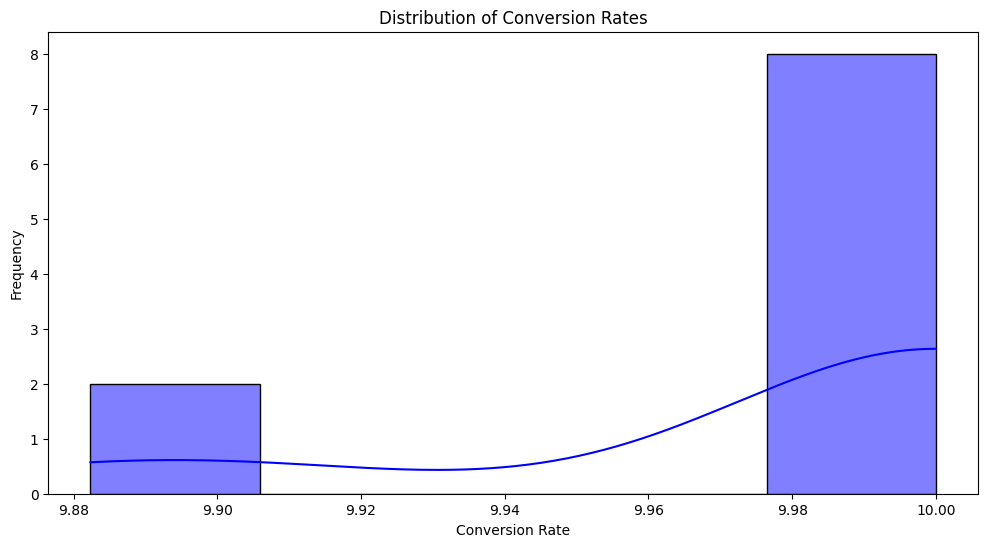

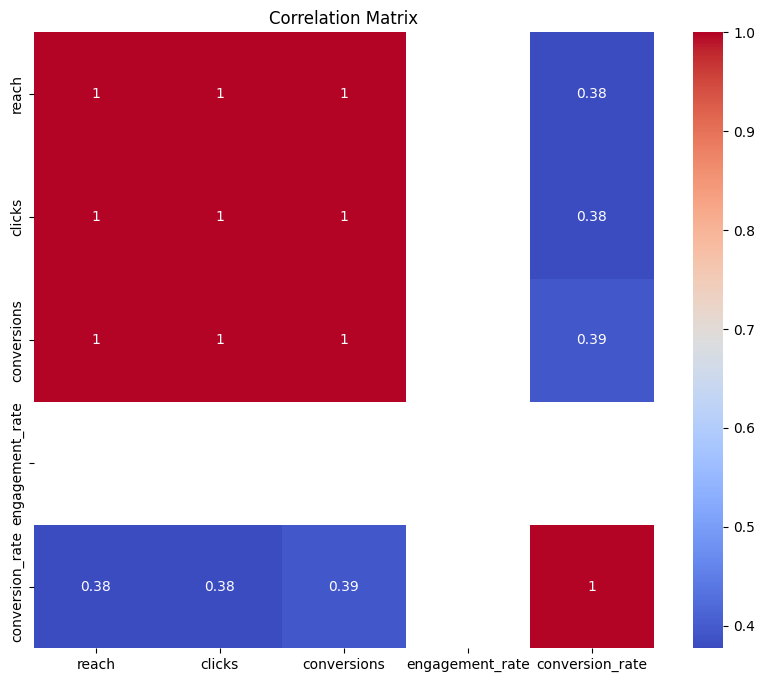


Campaign Performance:
     campaign  reach  clicks  conversions  conversion_rate
0  Campaign A  43500    2175          217         9.976190
1  Campaign B  42000    2100          210        10.000000
2  Campaign C  25500    1275          127         9.960784


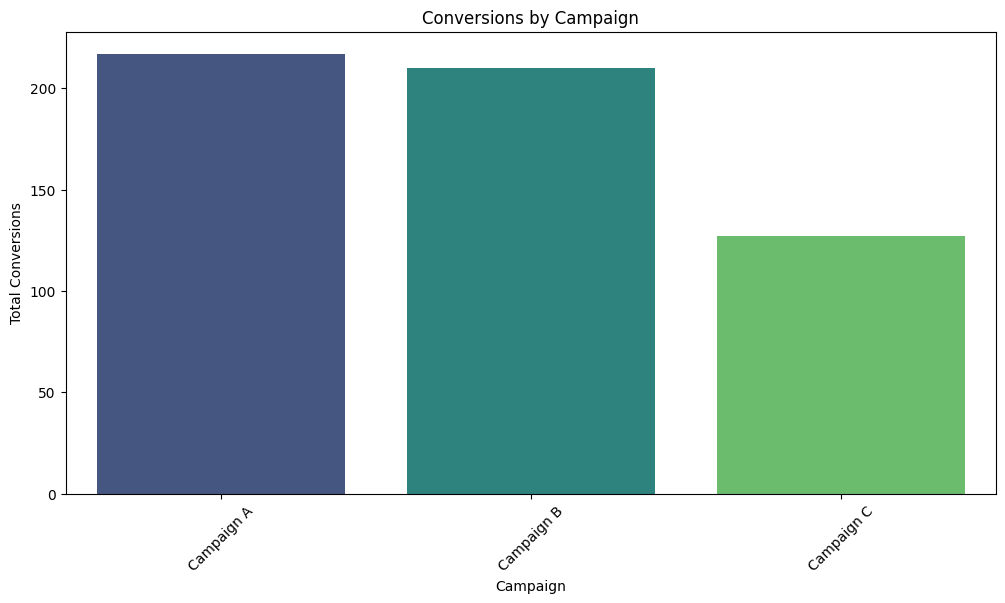

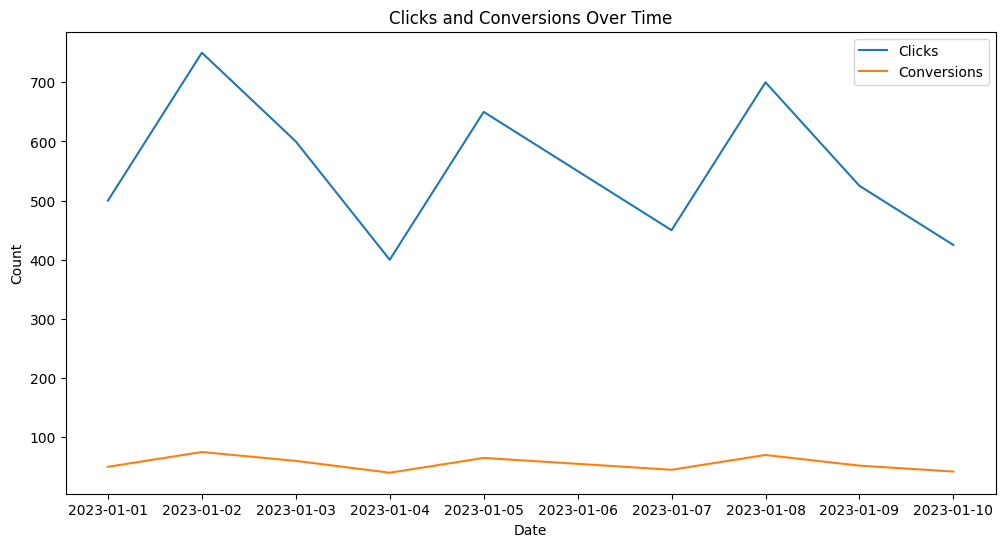


A/B Testing Results (Campaign A vs. Campaign B):
T-statistic: -4.462962333124183, P-value: 0.006622265038960597
There is a significant difference between the two campaigns.


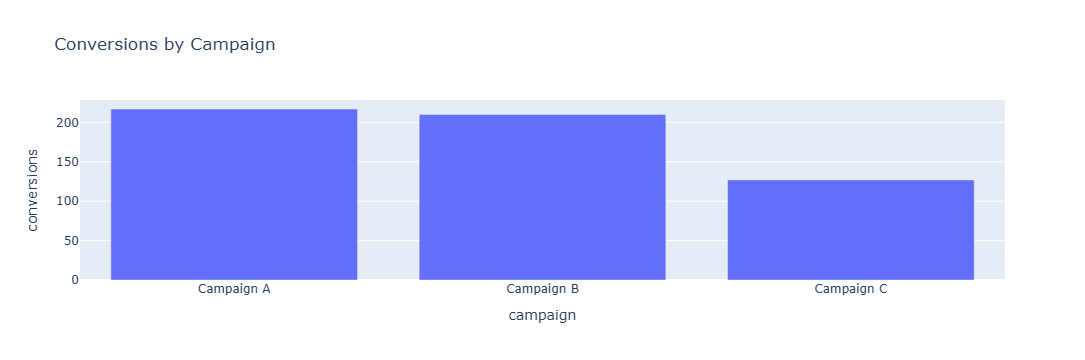

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

# Load the dataset
data = pd.read_csv('marketing_data.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Handle missing values (fill with 0 or drop)
data.fillna(0, inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Basic descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Check if required columns exist
required_columns = ['clicks', 'conversions']
for col in required_columns:
    if col not in data.columns:
        print(f"Warning: Column '{col}' not found in the dataset. Skipping related analysis.")
        # Optionally, you can skip the entire analysis or proceed with available columns

# Calculate additional metrics (e.g., conversion rate) if columns exist
if 'clicks' in data.columns and 'conversions' in data.columns:
    data['conversion_rate'] = (data['conversions'] / data['clicks']) * 100
    data['conversion_rate'] = data['conversion_rate'].fillna(0)  # Handle division by zero
else:
    print("Skipping conversion rate calculation due to missing columns.")

# Distribution of key metrics (if conversion_rate exists)
if 'conversion_rate' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data['conversion_rate'], kde=True, color='blue')
    plt.title('Distribution of Conversion Rates')
    plt.xlabel('Conversion Rate')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Skipping conversion rate distribution plot due to missing data.")

# Correlation matrix (if numeric columns exist)
numeric_columns = data.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    corr_matrix = data[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Skipping correlation matrix due to lack of numeric columns.")

# Campaign performance analysis (if 'campaign' column exists)
if 'campaign' in data.columns:
    campaign_performance = data.groupby('campaign').agg({
        'reach': 'sum',
        'clicks': 'sum',
        'conversions': 'sum',
        'conversion_rate': 'mean'
    }).reset_index()

    print("\nCampaign Performance:")
    print(campaign_performance)

    # Visualize campaign performance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='campaign', y='conversions', data=campaign_performance, hue='campaign', palette='viridis', legend=False)
    plt.title('Conversions by Campaign')
    plt.xlabel('Campaign')
    plt.ylabel('Total Conversions')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\n'campaign' column not found in the dataset. Skipping campaign performance analysis.")

# Trend analysis over time (if 'date' column exists)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    time_trend = data.groupby('date').agg({
        'clicks': 'sum',
        'conversions': 'sum'
    }).reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='date', y='clicks', data=time_trend, label='Clicks')
    sns.lineplot(x='date', y='conversions', data=time_trend, label='Conversions')
    plt.title('Clicks and Conversions Over Time')
    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.legend()
    plt.show()
else:
    print("\n'date' column not found in the dataset. Skipping trend analysis.")

# A/B Testing: Compare two campaigns (if 'campaign' and 'conversions' columns exist)
if 'campaign' in data.columns and 'conversions' in data.columns:
    campaigns = data['campaign'].unique()
    if len(campaigns) >= 2:
        campaign_a = data[data['campaign'] == campaigns[0]]['conversions']
        campaign_b = data[data['campaign'] == campaigns[1]]['conversions']

        # Perform t-test
        t_stat, p_value = stats.ttest_ind(campaign_a, campaign_b)
        print(f"\nA/B Testing Results ({campaigns[0]} vs. {campaigns[1]}):")
        print(f"T-statistic: {t_stat}, P-value: {p_value}")
        if p_value < 0.05:
            print("There is a significant difference between the two campaigns.")
        else:
            print("There is no significant difference between the two campaigns.")
    else:
        print("\nLess than 2 campaigns found. Skipping A/B testing.")
else:
    print("\n'campaign' or 'conversions' column not found in the dataset. Skipping A/B testing.")

# Interactive Dashboard (using Plotly, if 'campaign' and 'conversions' columns exist)
if 'campaign' in data.columns and 'conversions' in data.columns:
    fig = px.bar(campaign_performance, x='campaign', y='conversions', title='Conversions by Campaign')
    fig.show()
else:
    print("\n'campaign' or 'conversions' column not found in the dataset. Skipping interactive dashboard.")

# Save the cleaned dataset and results
data.to_csv('cleaned_marketing_data.csv', index=False)
if 'campaign' in data.columns:
    campaign_performance.to_csv('campaign_performance_summary.csv', index=False)